### Part 1

In [ ]:
from skimage import data, io, filters
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy.stats

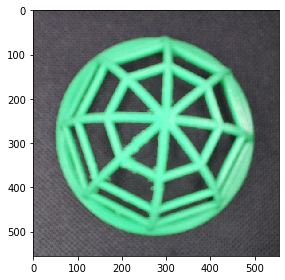

In [ ]:
image07 = io.imread('/content/drive/MyDrive/IMSE_641/image07-edit.jpg')
io.imshow(image07)

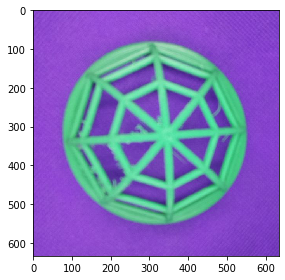

In [ ]:
standard = io.imread('/content/drive/MyDrive/IMSE_641/standard image-edit.jpg')
io.imshow(standard)

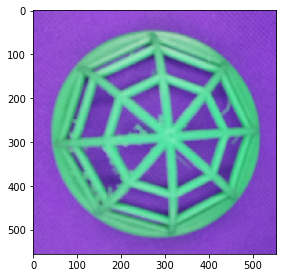

In [ ]:
# Resize to match image07
standard_cropped=standard[35:590, 35:590]
plt.figure(figsize=(4, 4))
io.imshow(standard_cropped)
io.show()

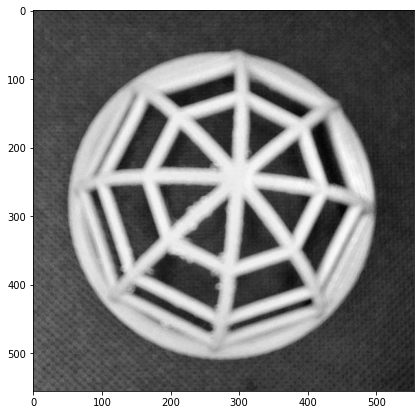

In [ ]:
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
 
# Displaying the sample image
plt.imshow(image07)
# Converting RGB image to Monochrome
gray_image07 = rgb2gray(image07)
plt.subplot(1, 2, 2)
 
# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_image07, cmap="gray")

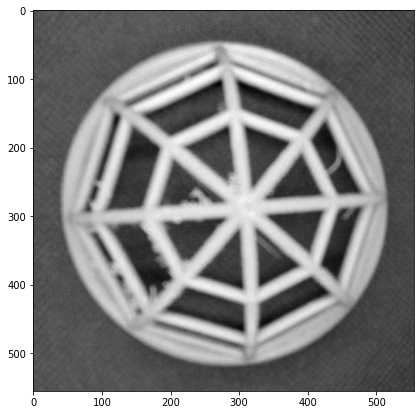

In [ ]:
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
 
# Displaying the sample image
plt.imshow(standard_cropped)
# Converting RGB image to Monochrome
gray_standard = rgb2gray(standard_cropped)
plt.subplot(1, 2, 2)
 
# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_standard, cmap="gray")

In [ ]:
gray_image07.shape

(555, 555)

In [ ]:
for value in gray_image07:
  print(value)

In [ ]:
nr=int(len(gray_image07.mean(axis=1)))
nc=int(len(gray_image07.mean(axis=0)))
print("number of rows=", nr)
print("number of columns=", nc)

number of rows= 555
number of columns= 555


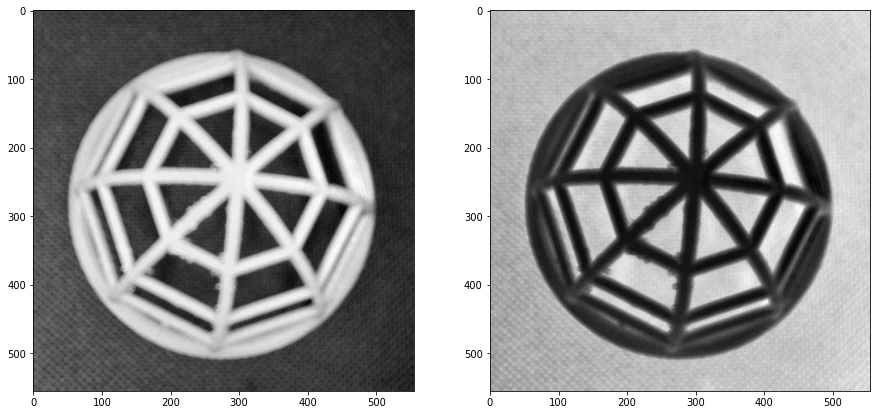

In [ ]:
# prepare a new image
# this all zeros in gray image will show all black since the values are zeros
negative_image07=np.zeros_like(gray_image07)
# since the gray scale has been standardized in [0, 1], 0 - black; 1 - white
# try: negative_image07[i][j]= -gray_image07[i][j]
for i in range(0, nr):
    for j in range(0, nc):
        negative_image07[i][j]=1-gray_image07[i][j]
    
# plt.imshow(negative_image07, cmap="gray")

# Displaying the images in two panels
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(gray_image07,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(negative_image07, cmap="gray")

In [ ]:
gray_standard.shape

(555, 555)

In [ ]:
for value in gray_standard:
  print(value)

In [ ]:
nr=int(len(gray_standard.mean(axis=1)))
nc=int(len(gray_standard.mean(axis=0)))
print("number of rows=", nr)
print("number of columns=", nc)

number of rows= 555
number of columns= 555


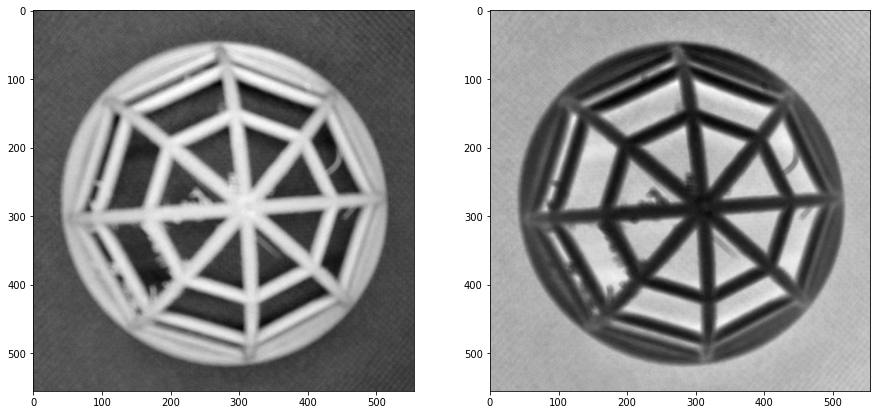

In [ ]:
# prepare a new image
# this all zeros in gray image will show all black since the values are zeros
negative_standard=np.zeros_like(gray_standard)
# since the gray scale has been standardized in [0, 1], 0 - black; 1 - white
# try: negative_standard[i][j]= -gray_standard[i][j]
for i in range(0, nr):
    for j in range(0, nc):
        negative_standard[i][j]=1-gray_standard[i][j]
    
# plt.imshow(negative_standard, cmap="gray")

# Displaying the images in two panels
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(gray_standard,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(negative_standard, cmap="gray")

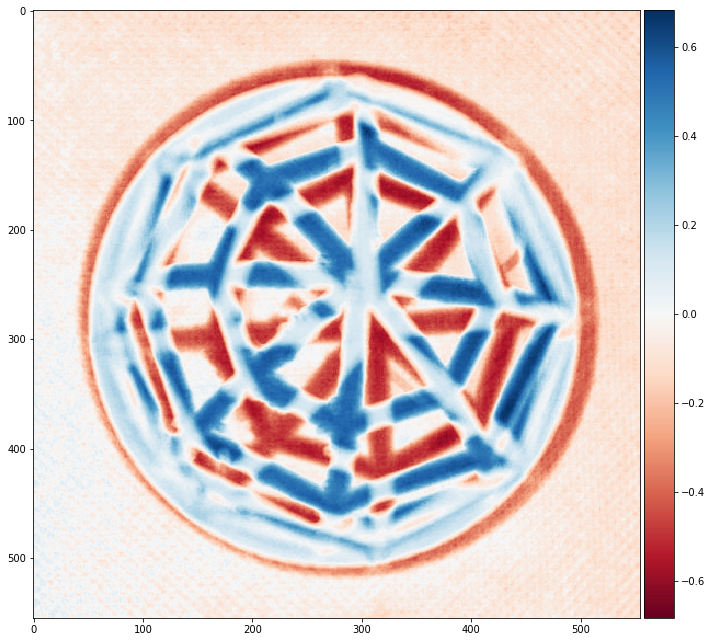

In [ ]:
# prepare a new image
# this all zeros in gray image will show all black since the values are zeros
import numpy as np
diff_image=np.zeros_like(negative_standard)
nr=len(negative_standard.mean(axis=1))
nc=len(negative_standard.mean(axis=0))
# since the gray scale has been standardized in [0, 1], 0 - black; 1 - white
for i in range(0, nr):
    for j in range(0, nc):
        diff_image[i][j]=negative_standard[i][j] - negative_image07[i][j]
plt.figure(figsize=(10, 10))
io.imshow(diff_image)
io.show()

In [ ]:
# Count black pixels
sought = [0,0,0]
# black  = np.count_nonzero(np.all(im==sought,axis=2))
black  = np.count_nonzero(diff_image)
print(f"black: {black}")

black: 308022


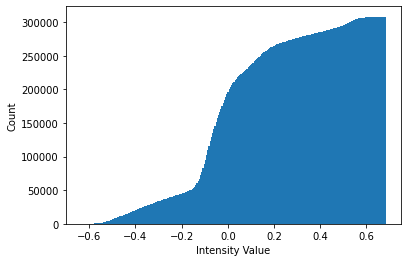

In [ ]:
# cumulative histogram of the diff image
_ = plt.hist(diff_image.ravel(), bins = 256, cumulative = True)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count') 
plt.show()

In [ ]:
# Mean
mean = np.mean(diff_image)
mean

-0.01575331180210417

In [ ]:
# Variance
variance = np.var(diff_image)
variance

0.05339163626113516

In [ ]:
# First quartile (Q1)
Q1 = np.percentile(diff_image, 25, interpolation = 'midpoint')
Q1

-0.10968313725490209

In [ ]:
# Second quartile (Q2)
Q2 = np.median(diff_image)
Q2

-0.045378823529411694

In [ ]:
# Third quartile (Q3)
Q3 = np.percentile(diff_image, 75, interpolation = 'midpoint')
Q3

0.0862745098039216

In [ ]:
# Inter quartile range (IQR)
IQR = Q3 - Q1
IQR

0.19595764705882368

In [ ]:
# Skewness - Something isn't right here?????
skewness = scipy.stats.skew(diff_image, axis=0, bias=True)
skewness

In [ ]:
# Kurtosis - Something isn't right here?????
kurtosis = scipy.stats.kurtosis(diff_image)
kurtosis

### Part 3 - For the phase 1 method, you will use the first 10 parts to establish the control limits. Use the following data set to establish the control limits for layers 100, 173, and 200. Assume that the first 10 parts are in the steady-state printing process. Report the charts used and their control limits.

#### Data Entry and Organization

In [ ]:
!pip install statsmodels==0.12.1
from scipy.stats import beta
from scipy.stats import f
from scipy.stats import multivariate_normal
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
plt.style.use('seaborn-colorblind')

from statsmodels.graphics.tsaplots import plot_acf

     |████████████████████████████████| 9.5 MB 3.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/243_layers_w_defect_641.csv',)
data1 = data.iloc[:,1:] #Eliminating unnamed row in data set
datap1 = data1.iloc[:,:10] #Phase I data first 10 parts
#datap1  #DataCheck

data100 = datap1.iloc[100,:] # Data phase 1 for layer 100
data100p2 = data1.iloc[100,:] # Data phase 2 for layer 100
#data100 #Data Check

data173 = datap1.iloc[173,:] # Data phase 1 for layer 173
data173p2 = data1.iloc[173,:] # Data phase 2 for layer 173
#data173 #Data Check

data200 = datap1.iloc[200,:] # Data phase 1 for layer 200
data200p2 = data1.iloc[200,:] # Data phase 2 for layer 200
#data200 #Data Check

dm = datap1.mean(axis=1) # Mean of rows for phase I data
#dm

ds = datap1.std(axis=1) # Standard deviation of rows for phase I data
#ds

data100p2







s_d2     344
s_d3     355
s_d4     314
s_d5     269
s_d6     282
s_d7     362
s_d8     281
s_d9     318
s_d10    309
s_d12    469
s_d16    478
s_d19    488
s_d20    511
s_d23    605
s_d24    452
s_d26    482
s_d28    441
Name: 100, dtype: int64

#### Autocorrelation of Data

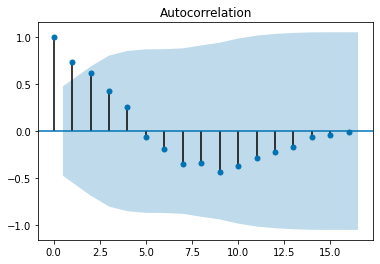

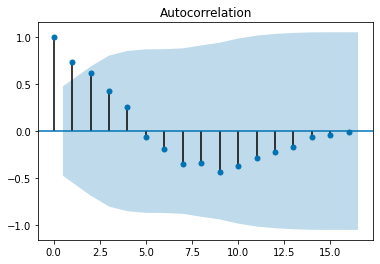

In [ ]:
plot_acf(data100p2, lags=16)

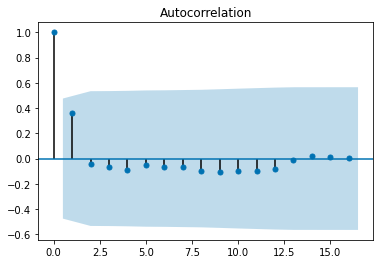

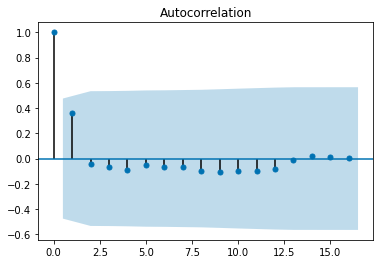

In [ ]:
plot_acf(data173p2, lags=16)

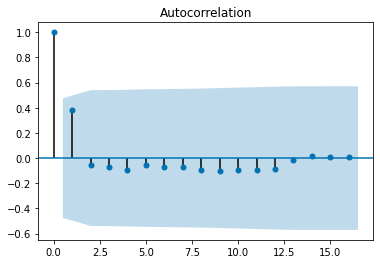

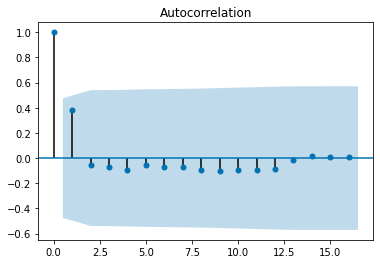

In [ ]:
plot_acf(data200p2, lags=16)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                    100   No. Observations:                   17
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -95.309
Date:                Wed, 11 May 2022   AIC                            196.618
Time:                        17:07:52   BIC                            199.118
Sample:                             0   HQIC                           196.867
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        396.4798     61.378      6.460      0.000     276.182     516.778
ar.L1          0.7164      0.149      4.822      0.000       0.425       1.008
sigma2      4157.1586   1791.997      2.320      0.0

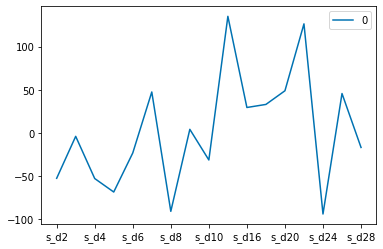

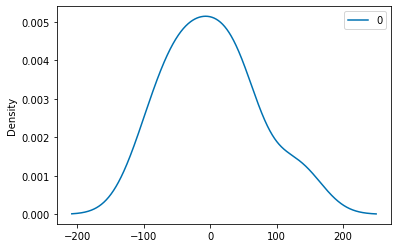

                0
count   17.000000
mean     2.207223
std     67.083494
min    -93.870917
25%    -52.479786
50%     -3.881443
75%     45.743602
max    135.193774


In [ ]:
model = ARIMA(data100p2, order=(1,0,0))
model_fit = model.fit()

print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())

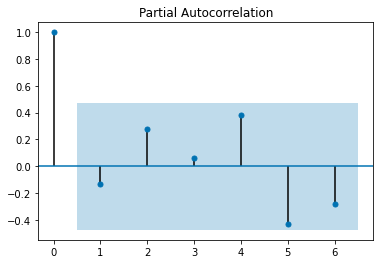

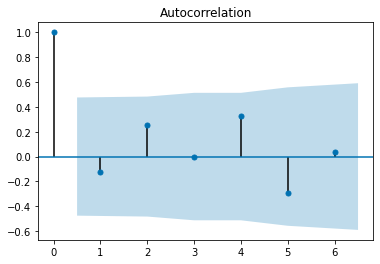

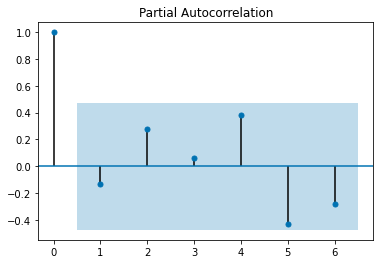

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(residuals, lags=6)
plot_pacf(residuals, lags=6)

#### Control Charts: IX-MR and CUSUM

In [ ]:
class MR_ControlChart:
    
    def fit(self,data, point):
        self.X = data
        self.number_of_sample = len(self.X)
        self.mR = np.zeros(((self.number_of_sample-1),1))
        self.Y = point
        self.number_of_sample2 = len(self.Y)
        self.mR2 = np.zeros(((self.number_of_sample2-1),1))

        for i in range(len(self.mR)):
            self.mR[i] = abs(self.X[i+1] - self.X[i])

        for i in range(len(self.mR2)):
            self.mR2[i] = abs(self.Y[i+1] - self.Y[i])
    
    def ControlChart(self,d2,D4,D3):
        
        ucl_X   = self.X.mean() + (3/d2)*self.mR.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - (3/d2)*self.mR.mean()

        ucl_mR   = D4*self.mR.mean()
        cl_mR    = self.mR.mean() 
        lcl_mR   = D3*self.mR.mean()
        

        plt.figure(figsize=(15,5))
        plt.plot(self.Y,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.Y),color="r",label="UCL={}".format(ucl_X))
        plt.plot([cl_X]*len(self.Y),color="b",label="CL={}".format(cl_X))
        plt.plot([lcl_X]*len(self.Y),color="r",label="LCL={}".format(lcl_X))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.Y)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.mR2 ,marker="o",color="k",label="mR ")
        plt.plot([ucl_mR ]*len(self.Y),color="r",label="UCL={}".format(ucl_mR))
        plt.plot([cl_mR ]*len(self.Y),color="b",label="CL={}".format(cl_mR))
        plt.plot([lcl_mR ]*len(self.Y),color="r",label="LCL={}".format(lcl_mR))
        plt.title("mR  Chart")
        plt.xticks(np.arange(len(self.Y)))
        plt.legend()
        plt.show()

In [ ]:
class CUSUM:
    def fit(self,data, h, k, mu, sigma):
        
        self.X     = data
        self.cplus     = np.zeros(len(data))
        self.cminus     = np.zeros(len(data))
        self.H = h * sigma
        self.K = k * sigma
        self.mean  = mu
        self.sigma = sigma
        self.cplus[0]  = 0
        self.cminus[0] = 0
        for i in range(1,len(self.X)):
            self.cplus[i] = max(0, self.X[i] -(self.mean+self.K) + self.cplus[i-1]) 
            self.cminus[i] = max(0, (self.mean-self.K) - self.X[i] + self.cminus[i-1])
            
    def  ControlChart(self):
        
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        
        
        for i in range(len(self.X)):
            ucl[i] = self.H
            lcl[i] = -1*self.H
              
        plt.figure(figsize=(15,5))
        plt.plot(self.cplus,marker="o",color="k",label="$C+$")
        plt.plot(-1*self.cminus,marker="x",color="k",label="$C-$")
        plt.plot(np.zeros(len(self.X)),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("CUSUM Conrol Chart")
        plt.legend(loc="upper left")
        plt.show()

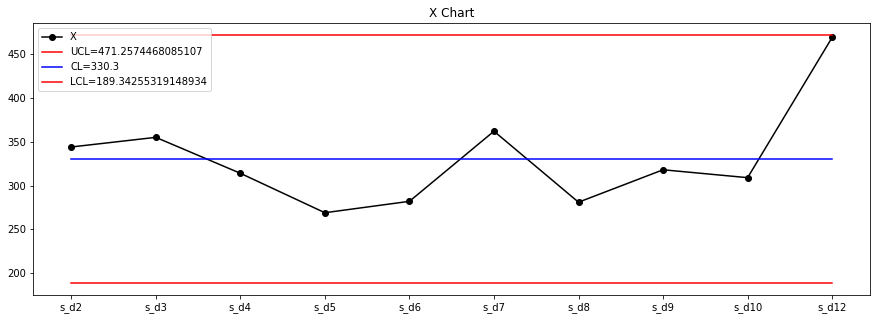

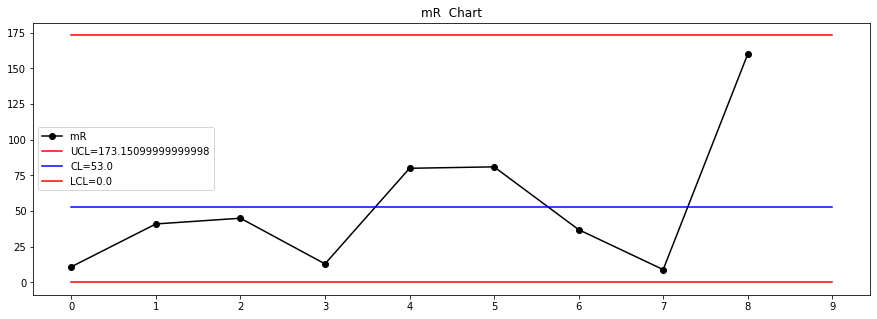

In [ ]:
#Layer 100 Phase I  IX & MR Chart
chart = MR_ControlChart()
chart.fit(data=data100, point=data100)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

In [ ]:
mean100 = statistics.mean(data100) #Mean of the phase one layer 100 data set
sd100 = statistics.stdev(data100) #Standard deviation of the phase one layer 100 data set
print('Mean of Phase 1 data is', mean100)
print('Std dev of Phase 1 data is', sd100)

Mean of Phase 1 data is 330.3
Std dev of Phase 1 data is 58.14932883915724


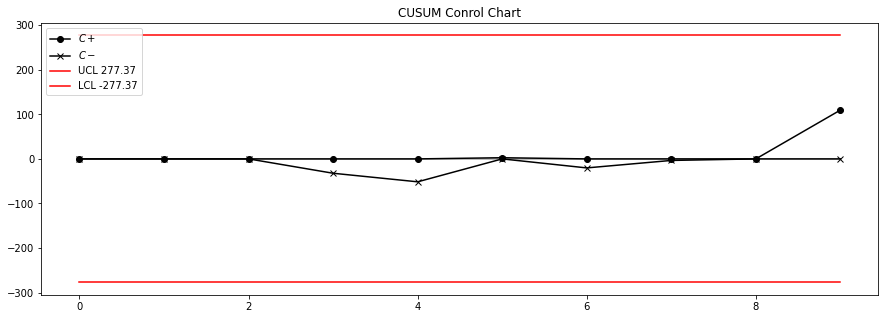

In [ ]:
chart = CUSUM()
chart.fit(data=data100, h=4.77, k=0.5, mu=mean100, sigma=sd100)
chart.ControlChart()

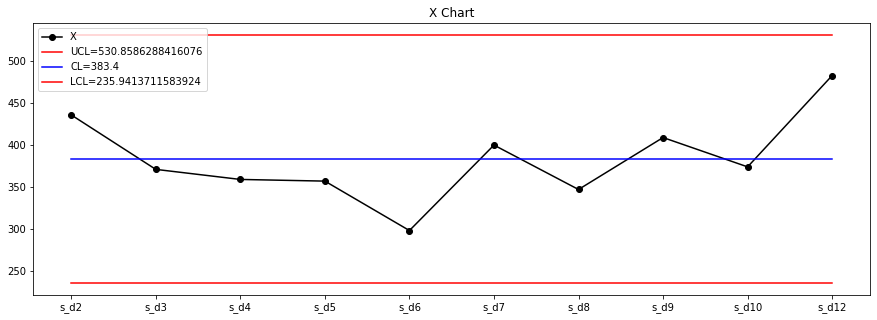

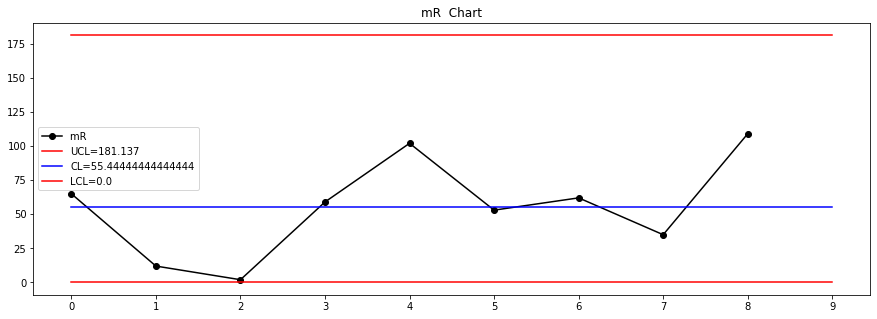

In [ ]:
#Layer 173 Phase I 
chart = MR_ControlChart()
chart.fit(data=data173, point=data173)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

In [ ]:
mean173 = statistics.mean(data173) #Mean of the phase one layer 173 data set
sd173 = statistics.stdev(data173) #Standard deviation of the phase one layer 173 data set
print('Mean of Phase 1 data is', mean173)
print('Std dev of Phase 1 data is', sd173)

Mean of Phase 1 data is 383.4
Std dev of Phase 1 data is 51.39217406916695


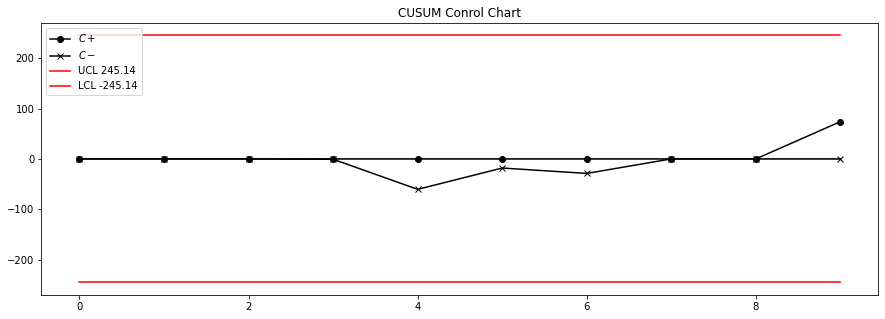

In [ ]:
# Cusum Chart for layer 173 Phase I
chart = CUSUM()
chart.fit(data=data173, h=4.77, k=0.5, mu=mean173, sigma=sd173)
chart.ControlChart()

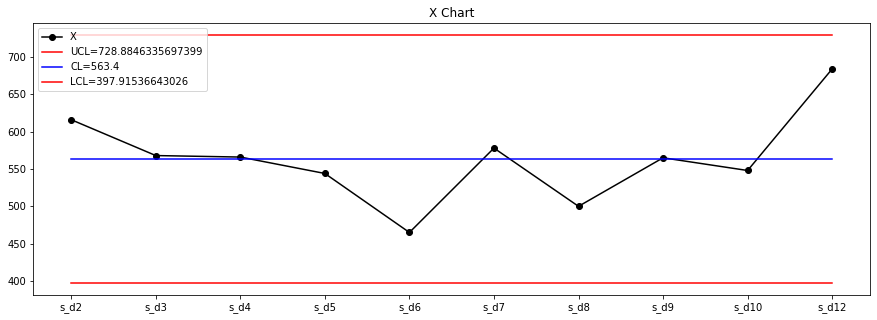

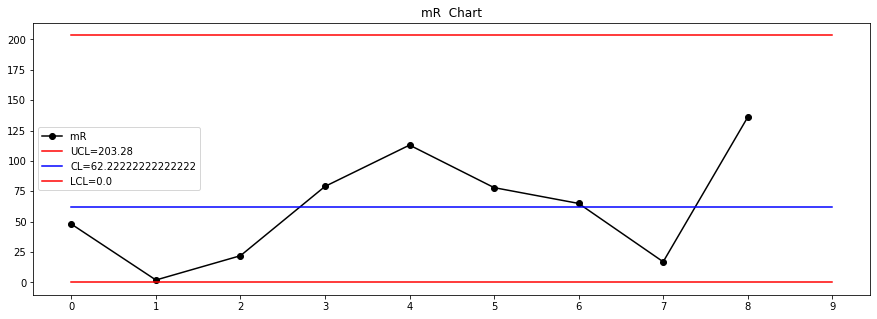

In [ ]:
#Layer 200 Phase I 
chart = MR_ControlChart()
chart.fit(data=data200, point=data200)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

In [ ]:
mean200 = statistics.mean(data200) #Mean of the phase one layer 173 data set
sd200 = statistics.stdev(data200) #Standard deviation of the phase one layer 173 data set
print('Mean of Phase 1 data is', mean200)
print('Std dev of Phase 1 data is', sd200)

Mean of Phase 1 data is 563.4
Std dev of Phase 1 data is 59.50760922399383


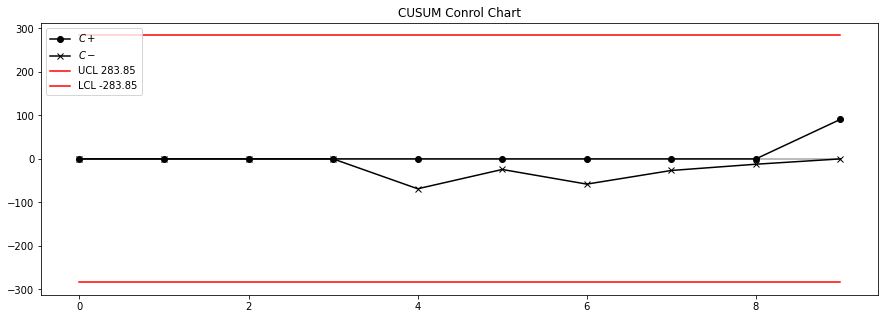

In [ ]:
# Cusum Chart for layer 200 Phase I
chart = CUSUM()
chart.fit(data=data200, h=4.77, k=0.5, mu=mean200, sigma=sd200)
chart.ControlChart()

The goal of this section is to identify and setup control charts for detecting shifts in the data. Data was collected as the difference in pixels from the gold standard part. Data was shifted to individual data streams for layers 100, 173 and 200. As previously mentioned, data was checked for correlation. Layer 100 had an issue with correlation that showed potential out of control. Data was looked at with an arima filter that showed the process as being in control. Conversely, layer 173 and 200 had no issues with correlation. This showed that the IID requirement was met. We stricly looked at univariable charts for individual layers with the goal of identifying when a part goes bad immediately. IX-MR and Cusum charts were used to check for out of control data points. IX-MR charts used control limits of d2 and D4 equaling 1.128 and 3.267. Conversely, the control limits for Cusum h and k are 4.77 and 0.5 respectively. The goal of thes limits is to make a chart comparison where arl0 is 370. Cusum mean and standard deviation for each layer was calculated for the phase I data. 
The following charts are the IX-MR and CUSUM charts for each individual layer. These are shown in Figures X to X. The control used in this section are IX-MR Charts and Cusums.

All calculation can be seen in Appendix X.

### 4. Phase II Control Charting (20 points) - Detecting out of Control printing layers

### Given the control chart design in Q3 and apply the SPM on parts 16 (column L) and 23 (column O) in layers 100, 173, and 200. Which part exhibits out of control? Provide all chartings and diagnoses. What actions would you take given the proposed layer-by-layer SPM implementation in this paper?

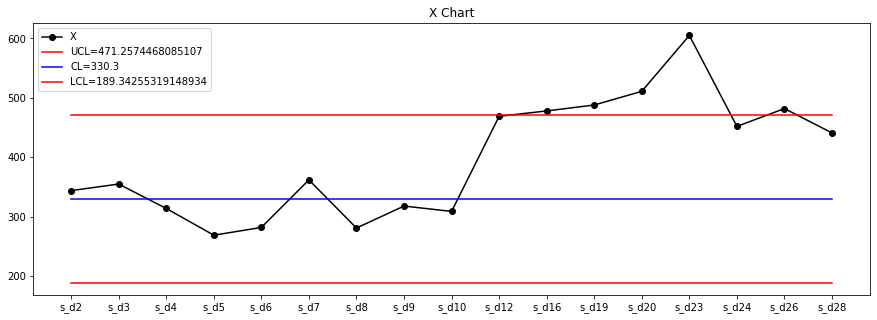

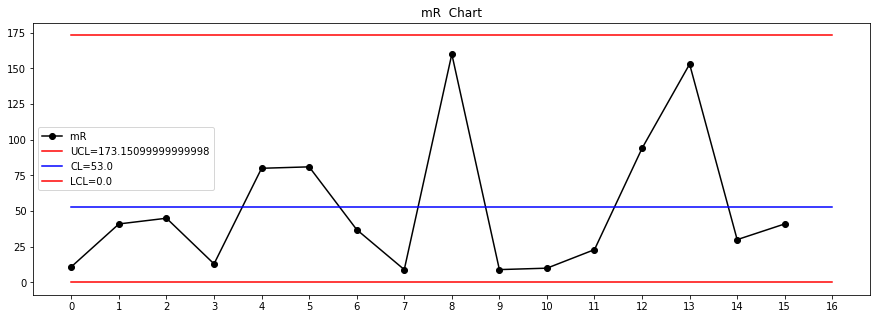

In [ ]:
#Layer 100 Phase II
chart = MR_ControlChart()
chart.fit(data=data100, point=data100p2)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

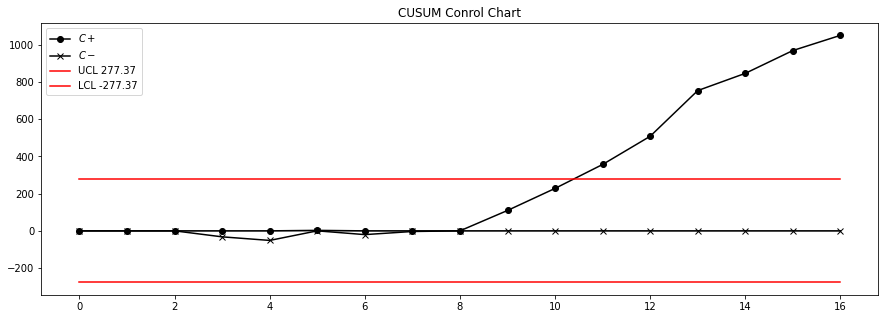

In [ ]:
# Cusum for Phase II data layer 100
chart = CUSUM()
chart.fit(data=data100p2, h=4.77, k=0.5, mu=mean100, sigma=sd100)
chart.ControlChart()

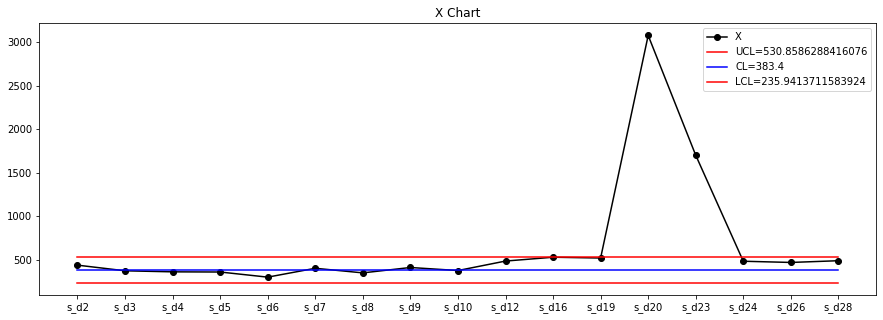

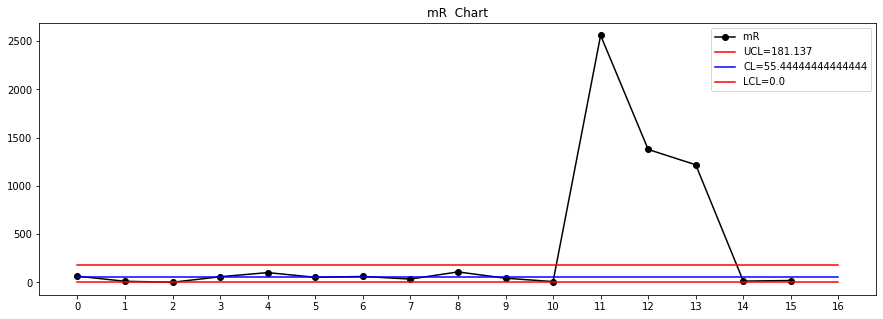

In [ ]:
#Layer 173 Phase II
chart = MR_ControlChart()
chart.fit(data=data173, point=data173p2)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

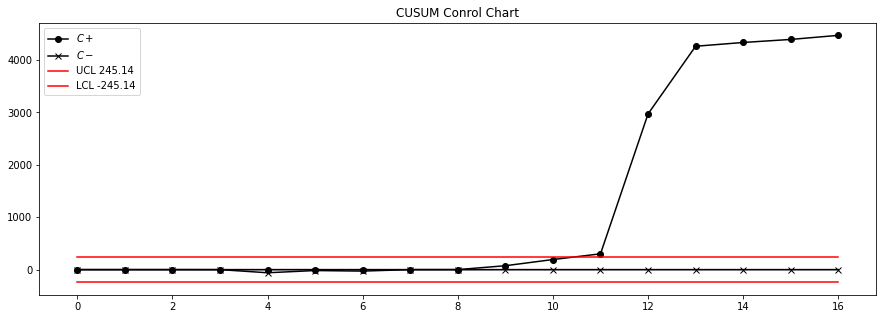

In [ ]:
# Cusum for layer 173 phase II data
chart = CUSUM()
chart.fit(data=data173p2, h=4.77, k=0.5, mu=mean173, sigma=sd173)
chart.ControlChart()

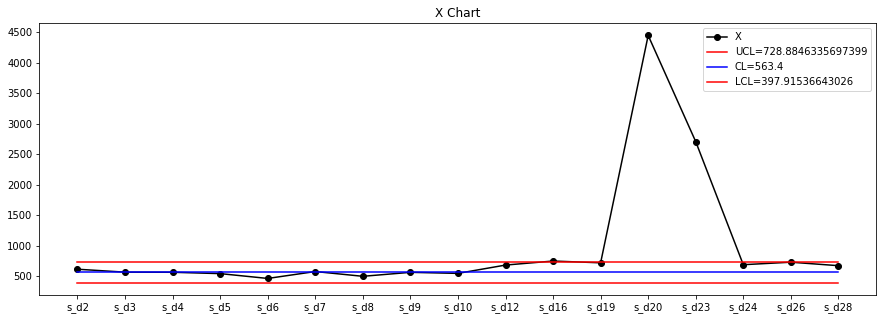

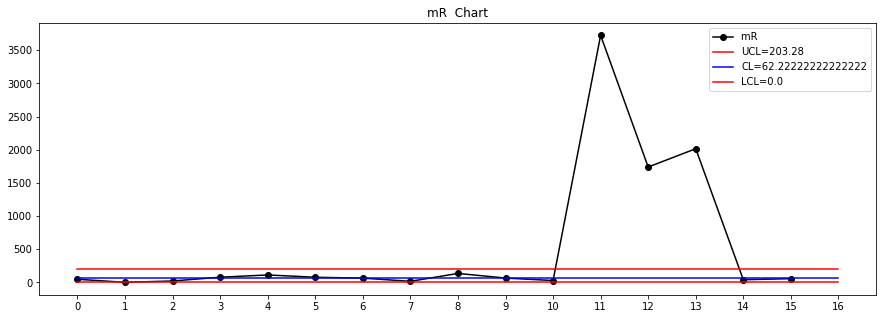

In [ ]:
#Layer 200 Phase II 
chart = MR_ControlChart()
chart.fit(data=data200, point=data200p2)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

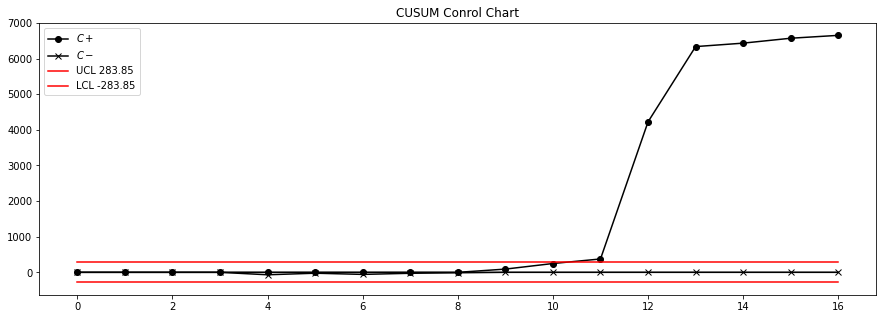

In [ ]:
# Cusum for layer 200 Phase II data
chart = CUSUM()
chart.fit(data=data200p2, h=4.77, k=0.5, mu=mean200, sigma=sd200)
chart.ControlChart()